<a href="https://colab.research.google.com/github/huyunwei/robust/blob/main/robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robust Design
## Tolerance Analysis
### Monte Carlo Simulation   

Monte Carlo simulation is a useful method for performing tolerance stack-up analysis. This method relies on statistical sampling to obtain a numerical result.  

Here's a simple example of using Monte Carlo simulation to perform tolerance stack-up analysis. Suppose we have a system with three components, each with its own nominal dimension and tolerance.  

We'll create a Python script to perform 10,000 simulations and understand the distribution of the total stack-up.  

This script defines the nominal dimensions and tolerances of the components and then simulates the total stack-up using random numbers from a normal distribution with means equal to the nominal dimensions and standard deviations equal to the tolerances.

The resulting histogram shows the distribution of the total stack-up over the simulations, which helps in understanding the variability in the system due to the tolerances of the individual components.

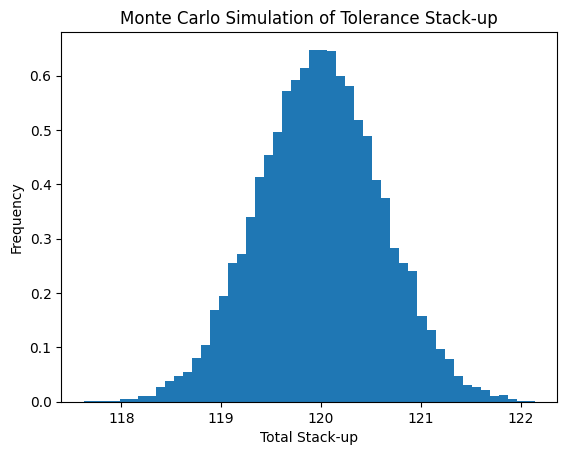

In [ ]:
import random
import matplotlib.pyplot as plt

def monte_carlo_simulation(num_simulations):
    # Nominal dimensions and tolerances for three components
    nominal_dimensions = [50, 50, 20]
    tolerances = [0.5, 0.3, 0.2]

    # List to store the total stack-up for each simulation
    total_stack_ups = []

    # Perform simulations
    for _ in range(num_simulations):
        total_stack_up = 0
        for nominal, tolerance in zip(nominal_dimensions, tolerances):
            total_stack_up += random.gauss(nominal, tolerance)
        total_stack_ups.append(total_stack_up)

    return total_stack_ups

# Number of simulations
num_simulations = 10000

# Perform Monte Carlo simulation
total_stack_ups = monte_carlo_simulation(num_simulations)

# Plot histogram
plt.hist(total_stack_ups, bins=50, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
df_csv = """X,mu,sigma
B1, 50, 0.5
B2, 20, 01
B3, 30, 0.2
E, 100.1, 0.3
"""
df_X = pd.read_csv(StringIO(df_csv))
df_X

,X,mu,sigma
0,B1,50.0,0.5
1,B2,20.0,1.0
2,B3,30.0,0.2
3,E,100.1,0.3


In [ ]:
N_SIM = int(1e6)
df=pd.DataFrame()
for i in range(df_X.shape[0]):
  df[df_X['X'][i]] = np.random.normal(df_X.mu[i], df_X.sigma[i], N_SIM)

df

,B1,B2,B3,E
0,49.614103,19.412748,29.822588,100.241027
1,49.542804,19.600021,29.953551,99.982542
2,50.792958,21.501799,29.923155,100.158924
3,50.980466,19.792236,29.896657,100.126446
4,49.626007,20.218723,29.988133,99.920677
...,...,...,...,...
999995,50.648825,20.042305,29.718237,100.056106
999996,50.160115,21.891159,30.009786,99.904340
999997,49.257816,19.985973,29.933018,100.503814
999998,50.223031,19.164690,30.105657,99.434681


In [ ]:
transf = 'Gap = E - B1 - B2 - B3'
df = df.eval(transf)



In [ ]:
df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]  )

,B1,B2,B3,E,Gap
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.000290,20.001114,29.999802,100.099548,0.098342
std,0.500238,1.000379,0.199941,0.299576,1.175771
min,47.773597,14.496423,29.060282,98.728552,-5.619395
1%,48.835101,17.677937,29.534538,99.403499,-2.640366
5%,49.176457,18.355539,29.670624,99.607242,-1.835104
25%,49.662382,19.326456,29.864844,99.897537,-0.694122
50%,50.000534,20.000804,30.000133,100.099293,0.098440
75%,50.337793,20.674853,30.134868,100.301609,0.891833
95%,50.822897,21.647424,30.328347,100.592949,2.030578


In [ ]:
np.sqrt(np.sum(np.square(df_X.sigma)))

1.174734012447073

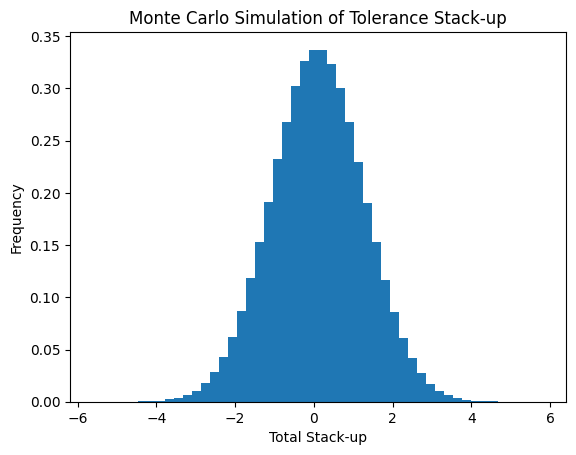

In [ ]:
# Plot histogram
import matplotlib.pyplot as plt
plt.hist(df.Gap, bins=50, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()

In [1]:
# import altair with an abbreviated alias
import altair as alt

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)